<a href="https://colab.research.google.com/github/Salma11D/Micro.Dynamics/blob/main/Ron'DynamicS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RonDynamicS#

Se elabora un programa para analizar ecuaciones diferenciales. Este programa proporciona el cálculo de vectores y valores propios asociados a una matriz dada. Además, grafica la dinámica del sistema para comprender sus trayectorias.
Nombre asignado para el programa: Ron´DynamicS , en honor a sus creadores: Ronaldo y Salma

##Descripción y explicación del programa elaborado##

Este código crea un programa interactivo en Python para trabajar con matrices, resolver sistemas de ecuaciones lineales y analizar sus propiedades, como valores y vectores propios.
A continuación una breve explicación de los pasos a seguir para la creación de este programa

1. Importación de Librerías:

NumPy (np): Para operaciones numéricas
SymPy (sp): Para matemáticas simbólicas
ipywidgets: Para crear widgets interactivos
IPython.display: Para mostrar elementos interactivos
Matplotlib (plt): Para graficar diagramas de fase y soluciones de ecuaciones diferenciales.
SciPy.integrate: Para resolver ecuaciones diferenciales numéricamente.

2. Función crear_matriz_interactiva(filas, columnas):

Esto nos permite crear crear una matriz de ceros con las dimensiones especificadas por el usuario.
Utiliza bucles for y widgets FloatText para generar cuadros de texto donde el usuario puede ingresar los valores de cada elemento de la matriz.

3. Función confirmar_valores(b):

Recopila los valores ingresados por el usuario en los widgets y los guarda en la matriz.
Limpia la pantalla (clear_output) y muestra la matriz ingresada usando sp.Matrix (para una representación formateada).

4. Función mostrar_ecuaciones(matriz):

Convierte la matriz en un sistema de ecuaciones lineales.
Utiliza sp.symbols para crear variables simbólicas (x1, x2, ...).
Construye las ecuaciones lineales multiplicando los elementos de la matriz por las variables correspondientes.

5. Función calcular_valores_vectores_propios(matriz):

Intenta calcular los valores y vectores propios de la matriz usando np.linalg.eig.
Muestra los valores y vectores propios calculados numéricamente.
Si la matriz no es cuadrada, muestra un mensaje de error.

6. Función graficar_diagrama_fase(matriz):

Crea un diagrama de fase que visualiza el comportamiento del sistema dinámico definido por la matriz.
Utiliza np.meshgrid para crear una malla de puntos en el plano.
Calcula las derivadas del sistema (dXdt) usando la matriz y la malla de puntos.
Utiliza plt.quiver para dibujar flechas que representan la dirección y magnitud del campo vectorial en cada punto.

7. Función graficar_solucion_diferencial(matriz):

Resuelve numéricamente la ecuación diferencial y' = matriz @ y usando odeint.
Grafica la solución de cada variable en función del tiempo

8. Función main():

Crea widgets interactivos para que el usuario ingrese las dimensiones de la matriz
Muestra un mensaje de error si las dimensiones ingresadas no son válidas.

9. Llamada a main():

Ejecuta la función main() para iniciar el programa interactivo.


En resumen, este código proporciona una herramienta interactiva para:

Introducir una matriz cuadrada.
Visualizar el sistema de ecuaciones lineales asociado.
Calcular y mostrar los valores y vectores propios de la matriz.
Visualizar el diagrama de fase del sistema dinámico.
Graficar la solución de la ecuación diferencial a través del tiempo.



##Fuentes de información##


Para la elaboración del programa, no se basó en una única fuente, sino en la integración de conceptos y técnicas de diferentes fuentes de información.

Se  utilizaron conceptos fundamentales como matrices, vectores, valores y vectores propios, sistemas de ecuaciones lineales y determinantes. **Gilbert Strang, David C. Lay y Serge Lang**
Ecuaciones diferenciales: **Strogatz Steven "nonlinear dynamics and chaos" **
**Ecuaciones Diferenciales con Aplicaciones" de Dennis G.**

#Código- Programa#

### Matriz ingresada:

Matrix([
[2.0, -1.0],
[3.0,  4.0]])

### Sistema de Ecuaciones:

Ecuación 1: $2.0 x_{1} - 1.0 x_{2} = 0$

Ecuación 2: $3.0 x_{1} + 4.0 x_{2} = 0$

### Procedimiento para Calcular Valores y Vectores Propios


1. **Definición de la Ecuación Característica**:
   - Para una matriz cuadrada \( A \), los valores propios son las soluciones de:
   \[
   	ext{det}(A - \lambda I) = 0
   \]
   donde \( I \) es la matriz identidad.

2. **Cálculo del Polinomio Característico**:
   - Se calcula el determinante:
   \[
   	ext{det}(A - \lambda I)
   \]
   obteniendo un polinomio en términos de \( \lambda \).

3. **Resolución del Polinomio**:
   - Las raíces del polinomio característico son los valores propios.

4. **Cálculo de Vectores Propios**:
   - Para cada valor propio \( \lambda_i \), se resuelve el sistema lineal:
   \[
   (A - \lambda_i I)x = 0
   \]
   para encontrar los vectores propios asociados.


### Polinomio Característico

\[ p(\lambda) = λ^{2} - 6.0 λ + 11.0 \]

### Valores Propios (Raíces del Polinomio Característico)

\( \lambda_1 = 3.0 - 1.4142135623731 i \)

\( \lambda_2 = 3.0 + 1.4142135623731 i \)

### Valores Propios Calculados Numéricamente

Valor propio 1: 3.0000+1.4142j

Valor propio 2: 3.0000-1.4142j

### Vectores Propios Asociados

Vector propio asociado a \( \lambda_1 \): [0.2887-0.4082j, -0.8660+0.0000j]

Vector propio asociado a \( \lambda_2 \): [0.2887+0.4082j, -0.8660-0.0000j]

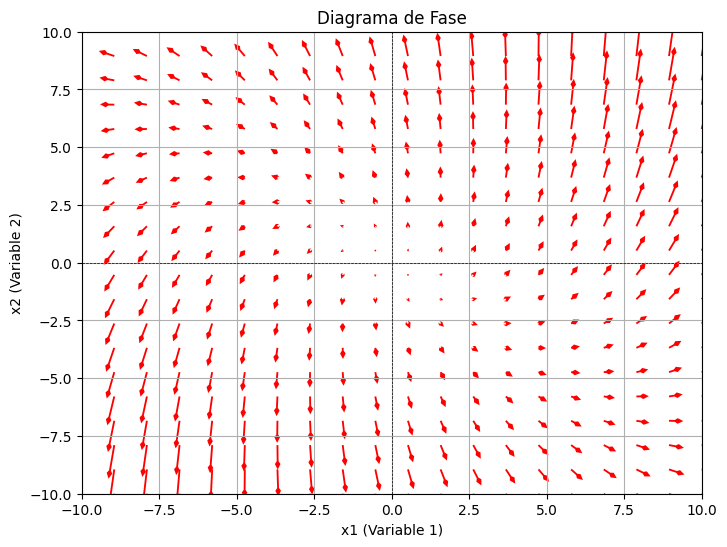

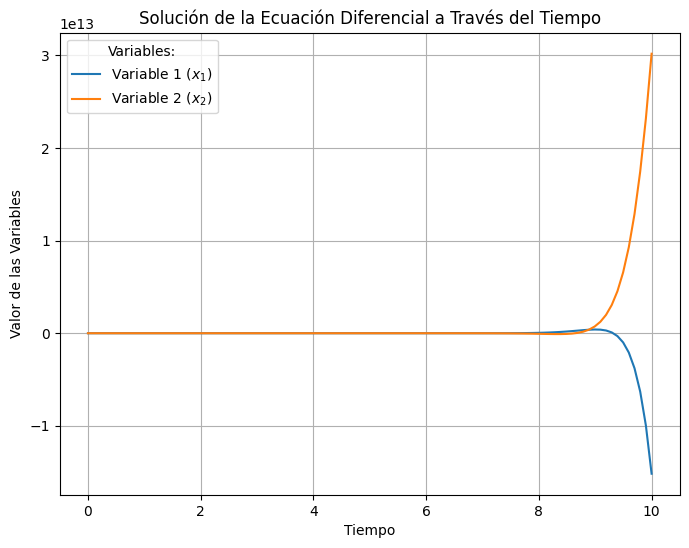

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import sympy as sp
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Función para crear la matriz interactivamente
def crear_matriz_interactiva(filas, columnas):
    matriz = np.zeros((filas, columnas))
    inputs = []

    # Crear widgets para ingresar los valores de la matriz
    for i in range(filas):
        fila_inputs = []
        for j in range(columnas):
            input_box = widgets.FloatText(
                value=0.0,
                description=f"A[{i+1},{j+1}]",
                layout=widgets.Layout(width='150px')
            )
            fila_inputs.append(input_box)
        inputs.append(fila_inputs)

    # Mostrar los widgets en una tabla
    display(Markdown("### Ingrese los valores de la matriz:"))
    for fila in inputs:
        display(widgets.HBox(fila))

    # Botón para confirmar los valores
    def confirmar_valores(b):
        for i in range(filas):
            for j in range(columnas):
                matriz[i][j] = inputs[i][j].value

        clear_output(wait=True)
        display(Markdown("### Matriz ingresada:"))
        display(sp.Matrix(matriz))

        # Mostrar sistema de ecuaciones, valores y vectores propios
        mostrar_ecuaciones(matriz)
        calcular_valores_vectores_propios(matriz)

        # Generar y mostrar el diagrama de fase
        graficar_diagrama_fase(matriz)

        # Graficar la solución de la ecuación diferencial a través del tiempo
        graficar_solucion_diferencial(matriz)

    boton_confirmar = widgets.Button(description="Confirmar valores")
    boton_confirmar.on_click(confirmar_valores)
    display(boton_confirmar)

# Función para mostrar el sistema de ecuaciones
def mostrar_ecuaciones(matriz):
    filas, columnas = matriz.shape
    variables = sp.symbols(f'x1:{columnas+1}')

    ecuaciones = []
    for i in range(filas):
        ecuacion = sum(matriz[i][j] * variables[j] for j in range(columnas))
        ecuaciones.append(ecuacion)

    display(Markdown("### Sistema de Ecuaciones:"))
    for i, eq in enumerate(ecuaciones):
        eq_formateada = sp.Eq(eq, 0)  # Representa la ecuación como igual a cero
        latex_eq = sp.latex(eq_formateada).replace('1 ', '')  # Eliminar "1 " en el LaTeX

        display(Markdown(f"Ecuación {i+1}: ${latex_eq}$"))

# Función para calcular valores y vectores propios con explicación detallada
def calcular_valores_vectores_propios(matriz):
    try:
        # Mostrar explicación del procedimiento
        display(Markdown("### Procedimiento para Calcular Valores y Vectores Propios"))
        display(Markdown("""
1. **Definición de la Ecuación Característica**:
   - Para una matriz cuadrada \( A \), los valores propios son las soluciones de:
   \[
   \text{det}(A - \lambda I) = 0
   \]
   donde \( I \) es la matriz identidad.

2. **Cálculo del Polinomio Característico**:
   - Se calcula el determinante:
   \[
   \text{det}(A - \lambda I)
   \]
   obteniendo un polinomio en términos de \( \lambda \).

3. **Resolución del Polinomio**:
   - Las raíces del polinomio característico son los valores propios.

4. **Cálculo de Vectores Propios**:
   - Para cada valor propio \( \lambda_i \), se resuelve el sistema lineal:
   \[
   (A - \lambda_i I)x = 0
   \]
   para encontrar los vectores propios asociados.
"""))

        # Paso 1: Calcular los valores propios y vectores propios usando NumPy
        valores_propios, vectores_propios = np.linalg.eig(matriz)

        # Mostrar cálculo del polinomio característico usando SymPy
        lambda_symbol = sp.symbols('λ')
        identidad = np.eye(matriz.shape[0])  # Matriz identidad
        matriz_simbolica = sp.Matrix(matriz)  # Convertir a matriz simbólica
        polinomio_caracteristico = sp.det(matriz_simbolica - lambda_symbol * sp.eye(matriz.shape[0]))

        display(Markdown("### Polinomio Característico"))
        display(Markdown(f"\\[ p(\\lambda) = {sp.latex(polinomio_caracteristico)} \\]"))

        # Resolver las raíces del polinomio característico (valores propios)
        raices = sp.solve(polinomio_caracteristico, lambda_symbol)
        display(Markdown("### Valores Propios (Raíces del Polinomio Característico)"))
        for i, raiz in enumerate(raices):
            display(Markdown(f"\\( \\lambda_{i+1} = {sp.latex(raiz)} \\)"))

        # Mostrar los valores propios calculados numéricamente
        display(Markdown("### Valores Propios Calculados Numéricamente"))
        for i, valor in enumerate(valores_propios):
            display(Markdown(f"Valor propio {i+1}: {valor:.4f}"))

        # Paso 2: Mostrar vectores propios asociados a cada valor propio
        display(Markdown("### Vectores Propios Asociados"))
        for i, vector in enumerate(vectores_propios.T):
            vector_str = ", ".join([f"{v:.4f}" for v in vector])
            display(Markdown(f"Vector propio asociado a \\( \\lambda_{i+1} \\): [{vector_str}]"))

    except np.linalg.LinAlgError:
        display(Markdown("**Error:** No se pudieron calcular los valores y vectores propios. Asegúrate de que la matriz sea cuadrada."))

# Función para graficar el diagrama de fase
def graficar_diagrama_fase(matriz):
    xlim = (-10, 10)
    ylim = (-10, 10)

    x = np.linspace(xlim[0], xlim[1], 20)
    y = np.linspace(ylim[0], ylim[1], 20)
    X1, Y1 = np.meshgrid(x, y)

    dXdt = matriz @ np.array([X1.ravel(), Y1.ravel()])

    plt.figure(figsize=(8, 6))

    plt.quiver(X1, Y1, dXdt[0].reshape(X1.shape), dXdt[1].reshape(Y1.shape), color='r', headlength=3)

    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.title('Diagrama de Fase')
    plt.xlabel('x1 (Variable 1)')
    plt.ylabel('x2 (Variable 2)')

    plt.grid()
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')

    plt.show()

# Función para graficar la solución de la ecuación diferencial a través del tiempo
def graficar_solucion_diferencial(matriz):
    t_start = 0
    t_stop = 10
    t_steps = 100
    t = np.linspace(t_start, t_stop, t_steps)

    y0 = [1] * matriz.shape[0]

    def sistema(y, t):
        return matriz @ np.array(y)

    solucion = odeint(sistema, y0, t)

    plt.figure(figsize=(8, 6))

    for i in range(solucion.shape[1]):
        plt.plot(t, solucion[:, i], label=f'Variable {i+1} ($x_{i+1}$)')

    plt.title('Solución de la Ecuación Diferencial a Través del Tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de las Variables')

    plt.grid()

    plt.legend(title="Variables:", loc="best")

    plt.show()

# Función principal con widgets interactivos
def main():
    filas_input = widgets.IntText(value=2, description="Filas:", layout=widgets.Layout(width='200px'))
    columnas_input = widgets.IntText(value=2, description="Columnas:", layout=widgets.Layout(width='200px'))

    def confirmar_dimensiones(b):
        filas = filas_input.value
        columnas = columnas_input.value

        if filas > 0 and columnas > 0:
            clear_output(wait=True)
            crear_matriz_interactiva(filas, columnas)
        else:
            display(Markdown("**Error:** Las dimensiones deben ser mayores a 0."))

    boton_confirmar_dimensiones = widgets.Button(description="Confirmar dimensiones")
    boton_confirmar_dimensiones.on_click(confirmar_dimensiones)

    display(Markdown("## Programa Interactivo para Trabajar con Matrices"))
    display(filas_input, columnas_input, boton_confirmar_dimensiones)

main()

### Matriz ingresada:

Matrix([
[0.0, 4.0],
[2.0, 1.0]])

### Sistema de Ecuaciones:

Ecuación 1: $4.0 x_{2} = 0$

Ecuación 2: $2.0 x_{1} + 1.0 x_{2} = 0$

### Procedimiento para Calcular Valores y Vectores Propios


**[Pasos a seguir](pplx://action/followup):**

1. **[Definición de la Ecuación Característica](pplx://action/followup)**:
   - Para una matriz cuadrada \( A \), los valores propios son las soluciones de:
   $$
   	ext{det}(A - \lambda I) = 0
   $$
   donde \( I \) es la matriz identidad.

2. **[Cálculo del Polinomio Característico](pplx://action/followup)**:
   - Se calcula el determinante:
   $$
   	ext{det}(A - \lambda I)
   $$
   obteniendo un polinomio en términos de \( \lambda \).

3. **[Resolución del Polinomio](pplx://action/followup)**:
   - Las raíces del polinomio característico son los valores propios.

4. **[Cálculo de Vectores Propios](pplx://action/followup)**:
   - Para cada valor propio \( \lambda_i \), se resuelve el sistema lineal:
   $$
   (A - \lambda_i I)x = 0
   $$
   para encontrar los vectores propios asociados.


### Polinomio Característico

$$ p(\lambda) = λ^{2} - 1.0 λ - 8.0 $$

### Valores Propios (Raíces del Polinomio Característico)

$$ \lambda_1 = -2.37228132326901 $$

$$ \lambda_2 = 3.37228132326901 $$

### Valores Propios Calculados Numéricamente

Valor propio 1: -2.3723

Valor propio 2: 3.3723

### Nota: Las raíces son **reales y distintas**.

### Vectores Propios Asociados

Vector propio asociado a $$ \lambda_1 $$: [-0.8601, 0.5101]

Vector propio asociado a $$ \lambda_2 $$: [-0.7645, -0.6446]

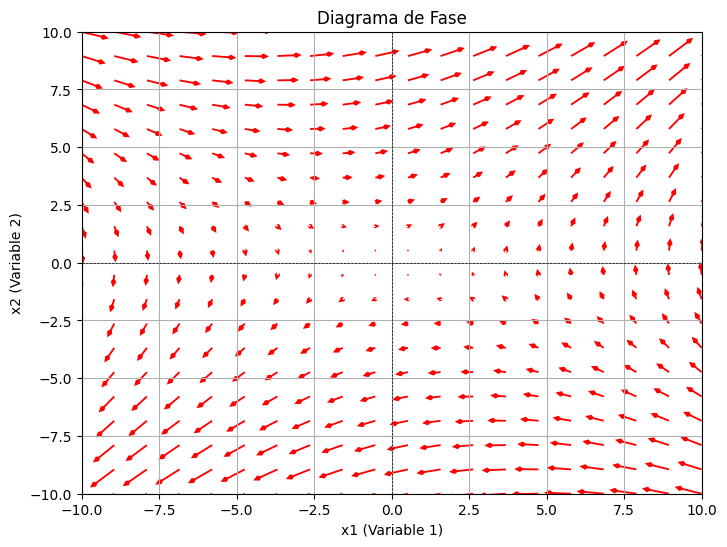

NameError: name 'graficar_solucion_diferencial' is not defined

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import sympy as sp
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Función para crear la matriz interactivamente
def crear_matriz_interactiva(filas, columnas):
    matriz = np.zeros((filas, columnas))
    inputs = []

    # Crear widgets para ingresar los valores de la matriz
    for i in range(filas):
        fila_inputs = []
        for j in range(columnas):
            input_box = widgets.FloatText(
                value=0.0,
                description=f"A[{i+1},{j+1}]",
                layout=widgets.Layout(width='150px')
            )
            fila_inputs.append(input_box)
        inputs.append(fila_inputs)

    # Mostrar los widgets en una tabla
    display(Markdown("### Ingrese los valores de la matriz:"))
    for fila in inputs:
        display(widgets.HBox(fila))

    # Botón para confirmar los valores
    def confirmar_valores(b):
        for i in range(filas):
            for j in range(columnas):
                matriz[i][j] = inputs[i][j].value

        clear_output(wait=True)
        display(Markdown("### Matriz ingresada:"))
        display(sp.Matrix(matriz))

        # Mostrar sistema de ecuaciones, valores y vectores propios
        mostrar_ecuaciones(matriz)
        calcular_valores_vectores_propios(matriz)

        # Generar y mostrar el diagrama de fase
        graficar_diagrama_fase(matriz)

        # Graficar la solución de la ecuación diferencial a través del tiempo
        graficar_solucion_diferencial(matriz)

    boton_confirmar = widgets.Button(description="Confirmar valores")
    boton_confirmar.on_click(confirmar_valores)
    display(boton_confirmar)

# Función para mostrar el sistema de ecuaciones
def mostrar_ecuaciones(matriz):
    filas, columnas = matriz.shape
    variables = sp.symbols(f'x1:{columnas+1}')

    ecuaciones = []
    for i in range(filas):
        ecuacion = sum(matriz[i][j] * variables[j] for j in range(columnas))
        ecuaciones.append(ecuacion)

    display(Markdown("### Sistema de Ecuaciones:"))
    for i, eq in enumerate(ecuaciones):
        eq_formateada = sp.Eq(eq, 0)  # Representa la ecuación como igual a cero
        latex_eq = sp.latex(eq_formateada).replace('1 ', '')  # Eliminar "1 " en el LaTeX

        display(Markdown(f"Ecuación {i+1}: ${latex_eq}$"))

# Función para calcular valores y vectores propios con explicación detallada
def calcular_valores_vectores_propios(matriz):
    try:
        # Mostrar explicación del procedimiento
        display(Markdown("### Procedimiento para Calcular Valores y Vectores Propios"))

        # Explicación mejorada del procedimiento
        display(Markdown("""
**[Pasos a seguir](pplx://action/followup):**

1. **[Definición de la Ecuación Característica](pplx://action/followup)**:
   - Para una matriz cuadrada \( A \), los valores propios son las soluciones de:
   $$
   \text{det}(A - \lambda I) = 0
   $$
   donde \( I \) es la matriz identidad.

2. **[Cálculo del Polinomio Característico](pplx://action/followup)**:
   - Se calcula el determinante:
   $$
   \text{det}(A - \lambda I)
   $$
   obteniendo un polinomio en términos de \( \lambda \).

3. **[Resolución del Polinomio](pplx://action/followup)**:
   - Las raíces del polinomio característico son los valores propios.

4. **[Cálculo de Vectores Propios](pplx://action/followup)**:
   - Para cada valor propio \( \lambda_i \), se resuelve el sistema lineal:
   $$
   (A - \lambda_i I)x = 0
   $$
   para encontrar los vectores propios asociados.
"""))

        # Paso 1: Calcular los valores propios y vectores propios usando NumPy
        valores_propios, vectores_propios = np.linalg.eig(matriz)

        # Mostrar cálculo del polinomio característico usando SymPy
        lambda_symbol = sp.symbols('λ')
        identidad = np.eye(matriz.shape[0])  # Matriz identidad
        matriz_simbolica = sp.Matrix(matriz)  # Convertir a matriz simbólica
        polinomio_caracteristico = sp.det(matriz_simbolica - lambda_symbol * sp.eye(matriz.shape[0]))

        display(Markdown("### Polinomio Característico"))
        display(Markdown(rf"$$ p(\lambda) = {sp.latex(polinomio_caracteristico)} $$"))

        # Resolver las raíces del polinomio característico (valores propios)
        raices = sp.solve(polinomio_caracteristico, lambda_symbol)

        display(Markdown("### Valores Propios (Raíces del Polinomio Característico)"))

        for i, raiz in enumerate(raices):
            display(Markdown(rf"$$ \lambda_{i+1} = {sp.latex(raiz)} $$"))

        # Mostrar los valores propios calculados numéricamente
        display(Markdown("### Valores Propios Calculados Numéricamente"))

        for i, valor in enumerate(valores_propios):
            display(Markdown(f"Valor propio {i+1}: {valor:.4f}"))

        # Clasificación de las raíces (Nota sobre su naturaleza)
        if len(raices) == 2:  # Solo aplicable a polinomios cuadráticos (2x2)
            a, b, c = sp.Poly(polinomio_caracteristico).all_coeffs()
            discriminante = b**2 - 4*a*c

            if discriminante > 0:
                tipo_raiz = "reales y distintas"
            elif discriminante == 0:
                tipo_raiz = "reales e iguales"
            else:
                tipo_raiz = "imaginarias"

            display(Markdown(f"### Nota: Las raíces son **{tipo_raiz}**."))

        # Paso 2: Mostrar vectores propios asociados a cada valor propio
        display(Markdown("### Vectores Propios Asociados"))

        for i, vector in enumerate(vectores_propios.T):
            vector_str = ", ".join([f"{v:.4f}" for v in vector])
            display(Markdown(rf"Vector propio asociado a $$ \lambda_{i+1} $$: [{vector_str}]"))

    except np.linalg.LinAlgError:
        display(Markdown("**Error:** No se pudieron calcular los valores y vectores propios. Asegúrate de que la matriz sea cuadrada."))

# Función para graficar el diagrama de fase (sin cambios)
def graficar_diagrama_fase(matriz):
    xlim = (-10, 10)
    ylim = (-10, 10)

    x = np.linspace(xlim[0], xlim[1], 20)
    y = np.linspace(ylim[0], ylim[1], 20)
    X1, Y1 = np.meshgrid(x, y)

    dXdt = matriz @ np.array([X1.ravel(), Y1.ravel()])

    plt.figure(figsize=(8, 6))

    plt.quiver(X1, Y1, dXdt[0].reshape(X1.shape), dXdt[1].reshape(Y1.shape), color='r', headlength=3)

    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.title('Diagrama de Fase')
    plt.xlabel('x1 (Variable 1)')
    plt.ylabel('x2 (Variable 2)')

    plt.grid()
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')

    plt.show()

# Función principal con widgets interactivos (sin cambios)
def main():
    filas_input = widgets.IntText(value=2, description="Filas:", layout=widgets.Layout(width='200px'))
    columnas_input = widgets.IntText(value=2, description="Columnas:", layout=widgets.Layout(width='200px'))

    def confirmar_dimensiones(b):
        filas = filas_input.value
        columnas = columnas_input.value

        if filas > 0 and columnas > 0:
            clear_output(wait=True)
            crear_matriz_interactiva(filas, columnas)
        else:
            display(Markdown("**Error:** Las dimensiones deben ser mayores a 0."))

    boton_confirmar_dimensiones = widgets.Button(description="Confirmar dimensiones")
    boton_confirmar_dimensiones.on_click(confirmar_dimensiones)

    display(Markdown("## Programa Interactivo para Trabajar con Matrices"))
    display(filas_input, columnas_input, boton_confirmar_dimensiones)

main()